# Stock Advisor

A simple to use notebook to help you stay informed on stock trends. Object implimentation is at the beginning: examples follow.

In [153]:
#Import lots of stuff
import heapq
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import pandas_datareader.data as web
import datetime
from statistics import mode
from scipy import stats
from scipy.stats import anderson
from scipy.stats import shapiro

#trying new plotting library
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

## The simple moving average object
Simple moving average analysis of stocks. Best for trending markets (not sidways/violate markets)

This is a Simple Moving Crossover Trading Strategy (Momentum class of strategies)
The code comes from part of the tutorial form this website:
https://www.datacamp.com/community/tutorials/finance-python-trading#tradingstrategy


In [162]:
class getData:
    def __init__(self, ticker, start, end): #executed when an sma object in created
        self.ticker = ticker   #must be all caps string (e.g. "MSFT")
        self.startDate = start #must be datetime.datetime(yyyy,mm,dd)
        self.endDate = end     #must be datetime.datetime(yyyy,mm,dd)
        
        # Check for valid inputs
        
        if len(self.ticker) < 1: #check for valid ticker
            print("\nInvalid ticker: length is less than 1 character\n")
        
        if(type(end) != datetime.datetime or type(start) != datetime.datetime): #check dates are correct object
            print("\nInvalid date start and/or end object(s): datetime.datetime(yyyy,mm,dd) required for start and end dates\n")
        
        if start>end: #check end is after start
            print("\nInvalid dates: start date is after end date\n")
        
        # Import stock data using pandasreader
        self.df = pdr.get_data_quandl(self.ticker, start=self.startDate, end=self.endDate)
        self.df = self.df.reindex(index=self.df.index[::-1]) #flip index so 0th row is oldest date
    
    def getDf(self):
        return self.df
    
    def viewDFhead(self):
        return self.df.head()
        
    def viewDFtail(self):
        return self.df.tail()
    
    def plotDF(self):
        #iteractive bokeh plot
        output_notebook() #puts plot inside notebook instead of making it in a new browser tab
        p = figure(title=self.ticker,x_axis_type='datetime',y_axis_label='Price $')
        p.line(self.df.index.values,self.df['Close'])
        show(p)
        
        #matplotlib version (not interactive)
        self.df['Close'].plot(grid=True,figsize=(12,8))
        plt.title(ticker)
        plt.ylabel('Price $')
        plt.show()


class sma:
    def __init__(self, df, ticker): #executed when an sma object in created
        self.df = df   #import dataframe
        self.ticker = ticker
        
    def createSMA(self, window): #Calculate SMA for given window_size
        self.window = window
        
        # Initialize the signals DataFrame
        self.signals = pd.DataFrame(index=self.df.index)
        self.signals['signal'] = 0.0

        # Create short simple moving average over the short window
        self.signals['mavg'] = self.df['Close'].rolling(window=self.window, min_periods=1, center=False).mean()
        
    def viewDFhead(self):
        return self.df.head()
        
    def viewDFtail(self):
        return self.df.tail()
    
    def getDF(self):
        return self.df

    def getSMA(self):
        return self.signals
    
    def plotDF(self):
        #iteractive bokeh plot
        output_notebook() #puts plot inside notebook instead of making it in a new browser tab
        p = figure(title=self.ticker,x_axis_type='datetime',y_axis_label='Price $')
        p.line(self.df.index.values,self.df['Close'])
        show(p)
        
        #matplotlib version (not interactive)
        self.df['Close'].plot(grid=True,figsize=(12,8))
        plt.title(ticker)
        plt.ylabel('Price $')
        plt.show()
        
    def plotSMA(self): #plot price with SMA short and long windows. For now, buy sell signals are not included
        fig = plt.figure()
        ax1 = fig.add_subplot(111, ylabel='Price in $')
        self.df['Close'].plot(ax=ax1, color='r', lw=2.)
        self.signals[['mavg']].plot(ax=ax1, lw=2.)
        plt.show()
        
        # Bohek plot (interactive)
        output_notebook() #puts plot inside notebook instead of making it in a new browser tab
        p = figure(title=self.ticker,x_axis_type='datetime',y_axis_label='Price $')
        p.line(self.df.index.values,self.df['Close'],color = 'red',legend='Close')
        p.line(self.df.index.values,self.signals['mavg'], color='green',legend=str(self.window))
        p.legend.click_policy="hide"
        show(p)

In [158]:
#get data
ticker = 'MSFT'
start = datetime.datetime(2016, 1, 10)
end = datetime.datetime(2018, 1, 10)
df = getData(ticker,start,end).getDf()
print(df.tail())
print(df.head())

             Open     High      Low  Close      Volume  ExDividend  \
Date                                                                 
2018-01-04  86.59  87.6600  86.5700  87.11  21145985.0         0.0   
2018-01-05  87.66  88.4100  87.4300  88.19  22526563.0         0.0   
2018-01-08  88.20  88.5800  87.6046  88.28  20293930.0         0.0   
2018-01-09  88.65  88.7272  87.8600  88.22  19390427.0         0.0   
2018-01-10  87.86  88.1900  87.4100  87.82  18129153.0         0.0   

            SplitRatio  AdjOpen  AdjHigh   AdjLow  AdjClose   AdjVolume  
Date                                                                     
2018-01-04         1.0    86.59  87.6600  86.5700     87.11  21145985.0  
2018-01-05         1.0    87.66  88.4100  87.4300     88.19  22526563.0  
2018-01-08         1.0    88.20  88.5800  87.6046     88.28  20293930.0  
2018-01-09         1.0    88.65  88.7272  87.8600     88.22  19390427.0  
2018-01-10         1.0    87.86  88.1900  87.4100     87.82  1812

In [167]:
sma1 = sma(df,ticker)
sma1.getDF()
#sma1.plotDF() #redirects to new page

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2016-01-11,52.510,52.8500,51.4600,52.300,36943756.0,0.00,1.0,50.001016,50.324771,49.001187,49.801050,36943756.0
2016-01-12,52.760,53.1000,52.0600,52.780,36095539.0,0.00,1.0,50.239071,50.562826,49.572518,50.258116,36095539.0
2016-01-13,53.800,54.0700,51.3038,51.640,66883571.0,0.00,1.0,51.229379,51.486478,48.852450,49.172586,66883571.0
2016-01-14,52.000,53.4163,51.5700,53.110,52381918.0,0.00,1.0,49.515385,50.864012,49.105931,50.572348,52381918.0
2016-01-15,51.310,51.9700,50.3400,50.990,71820697.0,0.00,1.0,48.858354,49.486818,47.934701,48.553644,71820697.0
2016-01-19,51.480,51.6800,50.0600,50.560,43564538.0,0.00,1.0,49.020231,49.210675,47.668080,48.144190,43564538.0
2016-01-20,49.980,51.3800,49.1000,50.790,63272993.0,0.00,1.0,47.591903,48.925009,46.753950,48.363200,63272993.0
2016-01-21,51.000,51.5800,50.3000,50.480,40191157.0,0.00,1.0,48.563166,49.115453,47.896613,48.068012,40191157.0
2016-01-22,51.410,52.3300,51.2600,52.290,37555789.0,0.00,1.0,48.953576,49.829617,48.810743,49.791528,37555789.0


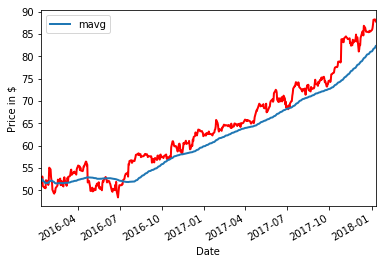

Loading BokehJS ...

In [168]:
sma1.createSMA(71)
sma1.plotSMA()

In [169]:
#Include more tests?

#checks normality of distribution make from closing price normalized to SMA
def checkNormality(sma_temp,window):
    sma_temp.createSMA(window)
    signals = sma_temp.getSMA()
    df2 = sma_temp.getDF()

    norm_data = df2['Close']-signals['mavg']
    
    #confidence level
    alpha = 0.001

    # null hypothesis: x comes from a normal distribution
    # null hypothesis rejection tracker: 0 -> fail to reject 1 -> reject
    tracker = []
    
    # D'Agostino normality test
    k2, p = stats.normaltest(norm_data)
    #print("p = {:g}".format(p))
    if p > alpha:
        tracker.append(0)
        #print('May be normal (fail to reject)')
    else:
        tracker.append(1)
        #print('Is not normal (reject)')
    
    # Shapiro normality test
    stat, p = shapiro(norm_data)
    #print('Statistics=%.5f, p=%.5f' % (stat, p))
    if p > alpha:
        tracker.append(0)
        #print('May be normal (fail to reject)')
    else:
        tracker.append(1)
        #print('Is not normal (reject)')
    return tracker, norm_data

drop stock
10


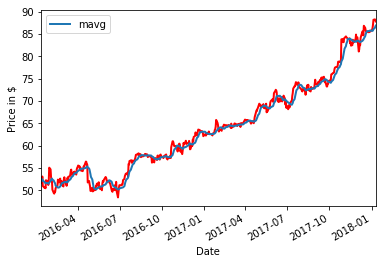

Loading BokehJS ...

In [177]:
#Make normal distribution; count down from 365 and select largest window that is normal
#If distribution passes both tests, we'll call that normal

found = False

for i in range(365,9,-1): #check windows from 365 to 10
    reject, norm_data = checkNormality(sma1,i)
    if sum(reject) == 0:
        found = True
        break
        
window = i

if found:
    print('largest window with normal distribution: ',window)
    norm_data.hist()
else:
    print('drop stock')
    print(window)
    
sma1.createSMA(window)
sma1.plotSMA()

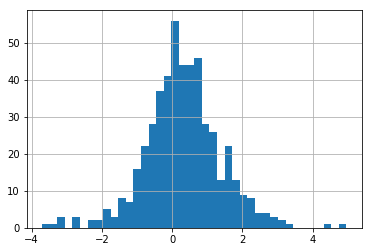

In [171]:
norm_data.hist(bins=40)

count    504.000000
mean       0.315268
std        1.090284
min       -3.704000
25%       -0.311500
50%        0.252000
75%        0.896250
max        4.964000
dtype: float64

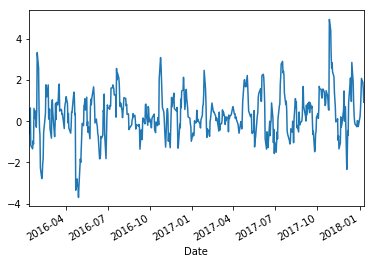

In [172]:
norm_data.plot()
norm_data.describe()

In [173]:
def buySignal(norm_data,sma_temp):
    #get normal distribution statistics
    ave = norm_data.describe()[1]
    low25 = norm_data.describe()[4]
    high75 = norm_data.describe()[6]
    
    #get moving average value for today
    mavg = sma_temp.getSMA()['mavg']
    today_sma = mavg[-1]
    
    #show data
    #print("today's price:\t\t",today_price)
    #print("expected value from sma: {:.4}".format(ave+today_sma))
    #print("expected 75% from sma:   {:.4}".format(high75+today_sma))
    
    #we want to buy if the price is > sma and < one standard deviation above the smagoing up past the average toward the 75% percentile
    if today_price > ave+today_sma and today_price < high75+today_sma:
        return "buy"
    else:
        return "Don't buy"

In [174]:
print(buySignal(norm_data,sma1))

Don't buy


In [176]:
#group each step together
#get data
ticker = 'MSFT'
start = datetime.datetime(2016, 1, 10)
end = datetime.datetime(2018, 1, 10)
df = getData(ticker,start,end).getDf()
print(df.tail())
print(df.head())

#make sma
Sma = sma(df,ticker)
guess = 20
Sma.createSMA(guess)

#Make normal distribution; count down from 365 and select largest window that is normal
#If distribution passes both tests, we'll call that normal
found = False
for i in range(365,9,-1): #check windows from 365 to 10
    reject, norm_data = checkNormality(sma1,i)
    if sum(reject) == 0:
        found = True
        break
window = i
if found:
    print('largest window with normal distribution: ',window)
else:
    print(window)
sma1.createSMA(window)
print(buySignal(norm_data,sma1))

             Open     High      Low  Close      Volume  ExDividend  \
Date                                                                 
2018-01-04  86.59  87.6600  86.5700  87.11  21145985.0         0.0   
2018-01-05  87.66  88.4100  87.4300  88.19  22526563.0         0.0   
2018-01-08  88.20  88.5800  87.6046  88.28  20293930.0         0.0   
2018-01-09  88.65  88.7272  87.8600  88.22  19390427.0         0.0   
2018-01-10  87.86  88.1900  87.4100  87.82  18129153.0         0.0   

            SplitRatio  AdjOpen  AdjHigh   AdjLow  AdjClose   AdjVolume  
Date                                                                     
2018-01-04         1.0    86.59  87.6600  86.5700     87.11  21145985.0  
2018-01-05         1.0    87.66  88.4100  87.4300     88.19  22526563.0  
2018-01-08         1.0    88.20  88.5800  87.6046     88.28  20293930.0  
2018-01-09         1.0    88.65  88.7272  87.8600     88.22  19390427.0  
2018-01-10         1.0    87.86  88.1900  87.4100     87.82  1812

Test effectiveness of model. Measure of effectiveness: shortest number of days until 5% profit (or greater). If signal returns -99, the buy (as of today) would not have returned 5%
1. Move through dates (365 day window, one day at a time (earliest day in data would be "yesterday")
2. Generate buy signal for "today"
3. If buy signal, search "future" days until price is greater than 5% "today" average (Open+Closing)/2 (assuming that's what we would have bought at)
4. If 5% gain is reached, store number of days to get there
5. If 5% gain never reached, return -99 as error code

In [193]:
start_date = datetime.datetime(2017, 1, 10)
end_date = datetime.datetime(2018, 1, 10)
df.date_range(start_date, end_date, freq='D').head()

AttributeError: 'DataFrame' object has no attribute 'date_range'

In [201]:
df.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2016-01-11,52.51,52.8500,51.4600,52.30,36943756.0,0.0,1.0,50.001016,50.324771,49.001187,49.801050,36943756.0
2016-01-12,52.76,53.1000,52.0600,52.78,36095539.0,0.0,1.0,50.239071,50.562826,49.572518,50.258116,36095539.0
2016-01-13,53.80,54.0700,51.3038,51.64,66883571.0,0.0,1.0,51.229379,51.486478,48.852450,49.172586,66883571.0
2016-01-14,52.00,53.4163,51.5700,53.11,52381918.0,0.0,1.0,49.515385,50.864012,49.105931,50.572348,52381918.0
2016-01-15,51.31,51.9700,50.3400,50.99,71820697.0,0.0,1.0,48.858354,49.486818,47.934701,48.553644,71820697.0


In [149]:
epochs = 200
ticker = 'MSFT'
start = datetime.datetime(2016, 1, 10)
end = datetime.datetime(2018, 1, 10)
df = getData(ticker,start,end).getDf()
buySignals = []
for j in range(epochs):
    #print(epochs-j)
    daysBack = datetime.timedelta(days=epochs-j)
    start = datetime.datetime(2017, 1, 10) - daysBack
    yesterday = datetime.datetime(2018,1,10) - daysBack
    Sma = sma(ticker, start, yesterday)
    Sma.createSMA(20) #20 is a guess and it's arbitrary

    #Make normal distribution; count down from 365 and select largest window that is normal
    #If distribution passes both tests, we'll call that normal
    found = False
    for i in range(365,9,-1): #check windows from 365 to 10
        reject, norm_data = checkNormality(Sma,i)
        if sum(reject) == 0:
            found = True
            break
    window = i
    if found:
        print('largest window with normal distribution: ',window)
    else:
        print(window)
    Sma.createSMA(window)
    
    #convert signal into 1 or 0. If buy, signal 1
    if(buySignal(norm_data,Sma)=="buy"):
        buySignals.append(1)
        #find future 5% gains
    else:
        buySignals.append(0)

largest window with normal distribution:  164
today's price:		 89.47
expected value from sma: 73.32
expected 75% from sma:   74.98
largest window with normal distribution:  166
today's price:		 89.47
expected value from sma: 73.34
expected 75% from sma:   75.04
largest window with normal distribution:  166
today's price:		 89.47
expected value from sma: 73.4
expected 75% from sma:   75.11
largest window with normal distribution:  163
today's price:		 89.47
expected value from sma: 73.53
expected 75% from sma:   75.22
largest window with normal distribution:  161
today's price:		 89.47
expected value from sma: 73.65
expected 75% from sma:   75.3
largest window with normal distribution:  161
today's price:		 89.47
expected value from sma: 73.64
expected 75% from sma:   75.3
largest window with normal distribution:  159
today's price:		 89.47
expected value from sma: 73.67
expected 75% from sma:   75.3
largest window with normal distribution:  158
today's price:		 89.47
expected value fro

10
today's price:		 89.47
expected value from sma: 85.91
expected 75% from sma:   86.41
10
today's price:		 89.47
expected value from sma: 86.04
expected 75% from sma:   86.55
10
today's price:		 89.47
expected value from sma: 86.05
expected 75% from sma:   86.55
10
today's price:		 89.47
expected value from sma: 86.05
expected 75% from sma:   86.55
10
today's price:		 89.47
expected value from sma: 86.05
expected 75% from sma:   86.55
10
today's price:		 89.47
expected value from sma: 86.07
expected 75% from sma:   86.57
10
today's price:		 89.47
expected value from sma: 86.08
expected 75% from sma:   86.58
10
today's price:		 89.47
expected value from sma: 86.12
expected 75% from sma:   86.61
10
today's price:		 89.47
expected value from sma: 86.21
expected 75% from sma:   86.7
10
today's price:		 89.47
expected value from sma: 86.21
expected 75% from sma:   86.7
10
today's price:		 89.47
expected value from sma: 86.21
expected 75% from sma:   86.7
10
today's price:		 89.47
expected 

In [151]:
sum(buySignals)

0